In [137]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_dir = './rescale/train/'
val_dir = './rescale/validation/'

In [160]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, class_mode='sparse', target_size=(150,150))

val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(directory=val_dir, batch_size=32, class_mode='sparse', target_size=(150,150))

Found 206 images belonging to 10 classes.
Found 54 images belonging to 10 classes.


In [161]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.8):
      self.model.stop_training = True

In [184]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(150,150,3)),
        hub.KerasLayer("https://tfhub.dev/adityakane2001/regnety600mf_feature_extractor/1", trainable=True), # Can be True
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation = 'softmax')
    ])

    model.compile(optimizer = tf.keras.optimizers.RMSprop(1e-3),
                loss = tf.keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])
    
    return model

In [185]:
"""
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(512, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
"""

"""
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape=(150,150,3)),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.AveragePooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
        tf.keras.layers.AveragePooling2D(2,2),
        tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),
        tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),
        tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),
        tf.keras.layers.AveragePooling2D(2,2),
        tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),
        tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),
        tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),
        tf.keras.layers.AveragePooling2D(2,2),
        tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),
        tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),
        tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),
        tf.keras.layers.AveragePooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation = 'relu'),
        tf.keras.layers.Dense(4096, activation = 'relu'),
        tf.keras.layers.Dense(4096, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
"""

"\n        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape=(150,150,3)),\n        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),\n        tf.keras.layers.AveragePooling2D(2,2),\n        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),\n        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),\n        tf.keras.layers.AveragePooling2D(2,2),\n        tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),\n        tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),\n        tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),\n        tf.keras.layers.AveragePooling2D(2,2),\n        tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),\n        tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),\n        tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),\n        tf.keras.layers.AveragePooling2D(2,2),\n        tf.keras.layers.Conv2D(512, (3,3), activation = 'relu'),\n        tf.keras.layers.Conv2D(512, (3,3), activation = 

In [186]:
model = create_model()

model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 7, 7, 608)         5605479   
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 3, 3, 608)        0         
 g2D)                                                            
                                                                 
 flatten_32 (Flatten)        (None, 5472)              0         
                                                                 
 dense_52 (Dense)            (None, 10)                54730     
                                                                 
Total params: 5,660,209
Trainable params: 5,630,442
Non-trainable params: 29,767
_________________________________________________________________


In [187]:
# Train your model
callbacks = myCallback()
history = model.fit(train_generator,
                    epochs=25,
                    batch_size=3,
                    validation_data=val_generator,
                    callbacks=callbacks)

Epoch 1/25


InvalidArgumentError: Graph execution error:

Detected at node 'gradients/Stage_3_YBlock_3/Stage_3_YBlock_3_conv3x3/Conv2D_grad/Conv2DBackpropInput' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\tegar\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\tegar\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\tegar\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "c:\Users\tegar\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\tegar\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "c:\Users\tegar\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "c:\Users\tegar\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\tegar\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\tegar\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\tegar\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\tegar\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\tegar\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\tegar\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\tegar\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\tegar\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\tegar\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\tegar\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\tegar\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\tegar\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\tegar\AppData\Local\Temp\ipykernel_4932\176523469.py", line 3, in <module>
      history = model.fit(train_generator,
    File "c:\Users\tegar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\tegar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\tegar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "c:\Users\tegar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\tegar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "c:\Users\tegar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1054, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\tegar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\optimizer.py", line 542, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "c:\Users\tegar\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\optimizer.py", line 275, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradients/Stage_3_YBlock_3/Stage_3_YBlock_3_conv3x3/Conv2D_grad/Conv2DBackpropInput'
Gradients for grouped convolutions are not supported on CPU. Please file a feature request if you run into this issue. Computed input depth 608 doesn't match filter input depth 16
	 [[{{node gradients/Stage_3_YBlock_3/Stage_3_YBlock_3_conv3x3/Conv2D_grad/Conv2DBackpropInput}}]] [Op:__inference_train_function_256782]

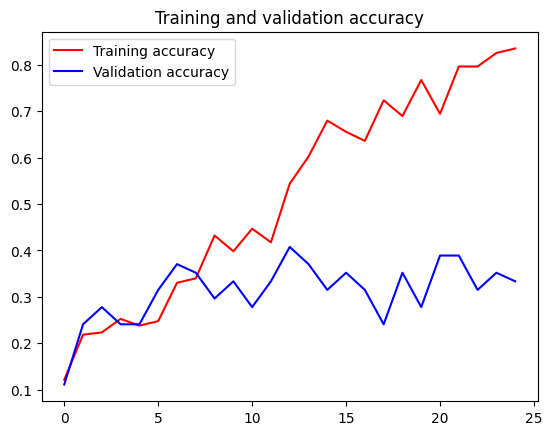

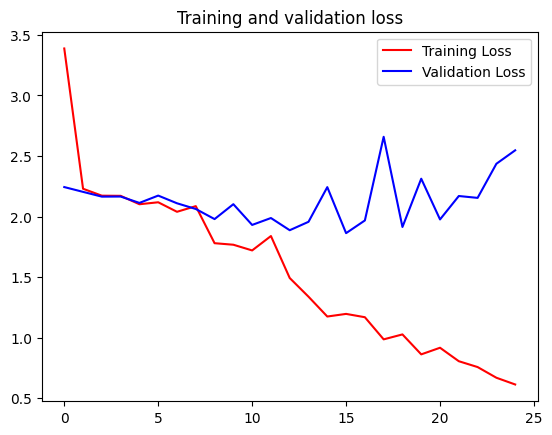

In [159]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [153]:
model.predict(train_generator[0][0])[0]

1/1 [==============================] - 0s 75ms/step


array([0.09690236, 0.11451119, 0.09538525, 0.1061502 , 0.10990901,
       0.0848434 , 0.10096778, 0.09745025, 0.09917089, 0.09470966],
      dtype=float32)

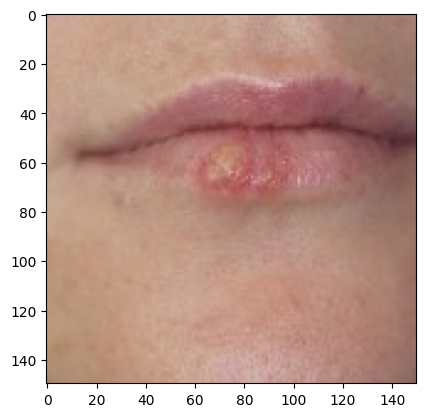

In [151]:
plt.imshow(train_generator[0][0][0])